In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import numpy as np
import math

# 18. Гравитационное поле Земли
Вычислить и построить графики зависимости напряженности гравитационного поля Земли от радиус-вектора (начало в центре Земли). Визуализировать векторное поле.

***
Выполнили Владислав Хобер и Александр Никитин

In [2]:
G = 6.67428e-11 # G - Гравитационная постоянная
M = 5.9742e+24  # M - Масса земли, Кг
p_avg = 5510        # p - Средняя плотность земли, Кг/м^3
R_Earth = 6371000 # Радиус земли, м

def poly_g(R: float) -> float:
    # Напряжённость (g) по модели PREM
    # Списал отсюда: https://profoundphysics.com/gravity-underground/
    # Но там неправильные знаки для b, поэтому перебором вывели правильные
    if (R < 3470):
        return -1.942e-2 + 3.853e-3*R - 2.22e-7*(R**2)
    else:
        return 16.82 + 3.114e-3*R - 4.059e-6 * (R**2) + 1.149e-9 * (R**3) - 1.278e-13 * (R**4) + 4.894e-18 * (R**5)

In [3]:
# Напряжённость на расстоянии R
def E(R: float) -> float:
    global G, M, poly_g, p_avg
    if (R >= R_Earth):
        return G * M / R**2
    else:
        # return 4/3 * np.pi * G * p_avg * R
        return poly_g(R/1000)

# 1 - График зависимости от радиус-вектора

In [4]:
# Стартовый интервал (в метрах)
int_start = 0.1
# Конечный интервал (в метрах)
int_end = 7000000*2
# Шаг в графике
step = 10000
# Максимальное значение по y
y_max = 12

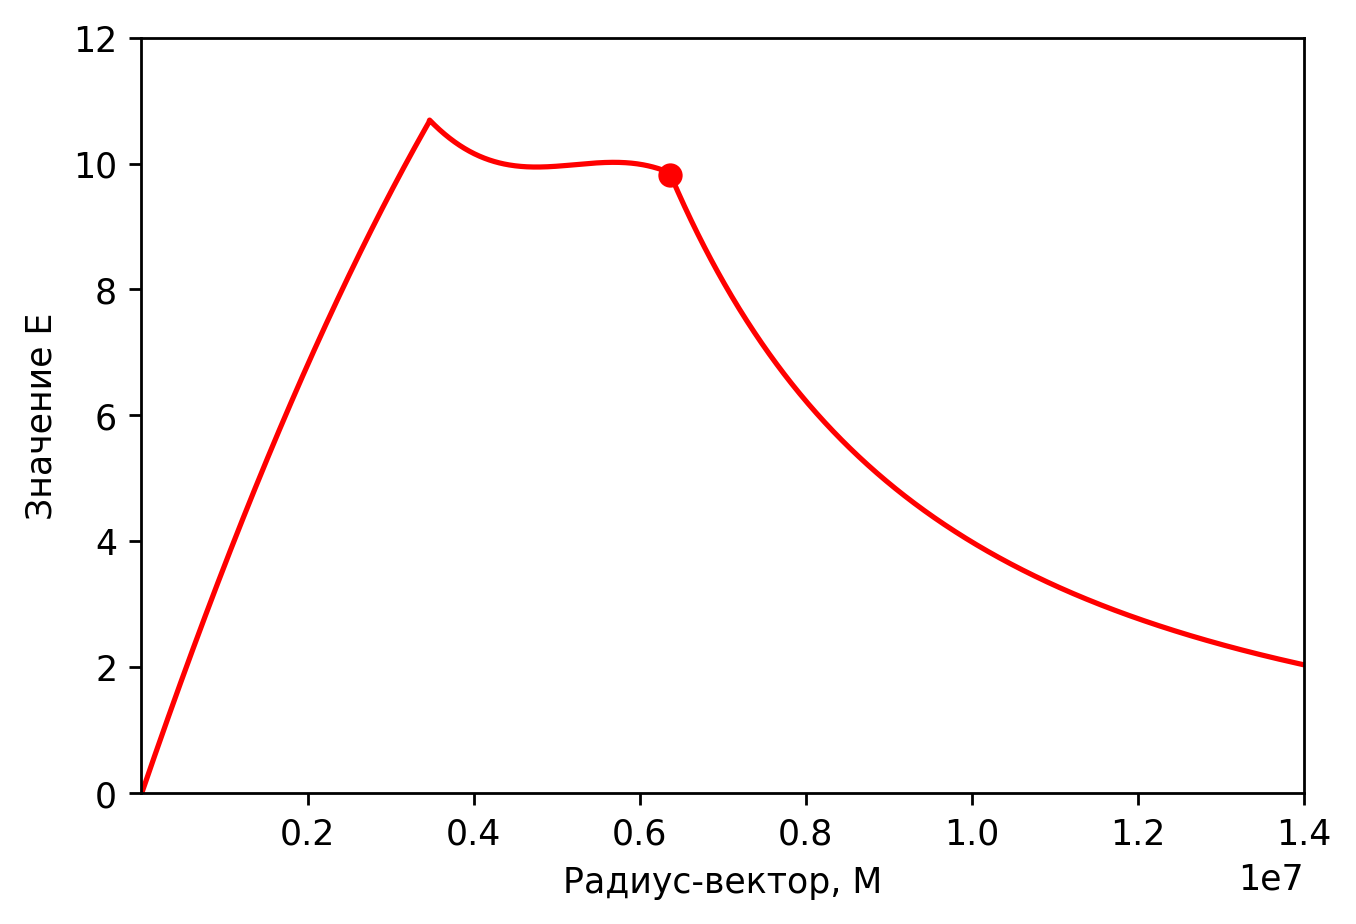

In [5]:
x = []
y = []
r = int_start
while r < int_end:
    x.append(r)
    y.append(E(r))
    r += step
plt.figure(dpi=250)
plt.xlim(int_start, int_end)
plt.ylim(0, y_max)
plt.scatter(R_Earth, E(R_Earth), color="r")
plt.plot(x,y, color="r")
plt.xlabel("Радиус-вектор, М")
plt.ylabel("Значение E")
plt.show()

# 2 - Векторное поле
*Полупрозрачный красный круг - радиус земли*

In [6]:
# Шаг между точками, из которых считаются вектора
step = 1000000
# Процент длины стрелочки от максимальной, который всегда есть
basearrowlen = 0.05
# Границы по осям, где (0,0) - центр земли
xlim = (-14000000, 14000000)
ylim = (-14000000, 14000000)

print(f"Векторное поле: {(xlim[1]-xlim[0])//step + 1}x{(ylim[1]-ylim[0])//step + 1}")

Векторное поле: 29x29


In [7]:
E_max = E(3470000)

def vec(x0: float, y0: float) -> tuple:
    global r, step, E_max, basearrowlen
    dist = math.sqrt(x0*x0 + y0*y0)
    if dist == 0: return (0,0)
    # Длина стрелочки относительно максимальной
    k = basearrowlen + (1-basearrowlen)*E(dist)/E_max
    dx = (-x0/dist)*step*k
    dy = (-y0/dist)*step*k
    return (dx,dy)

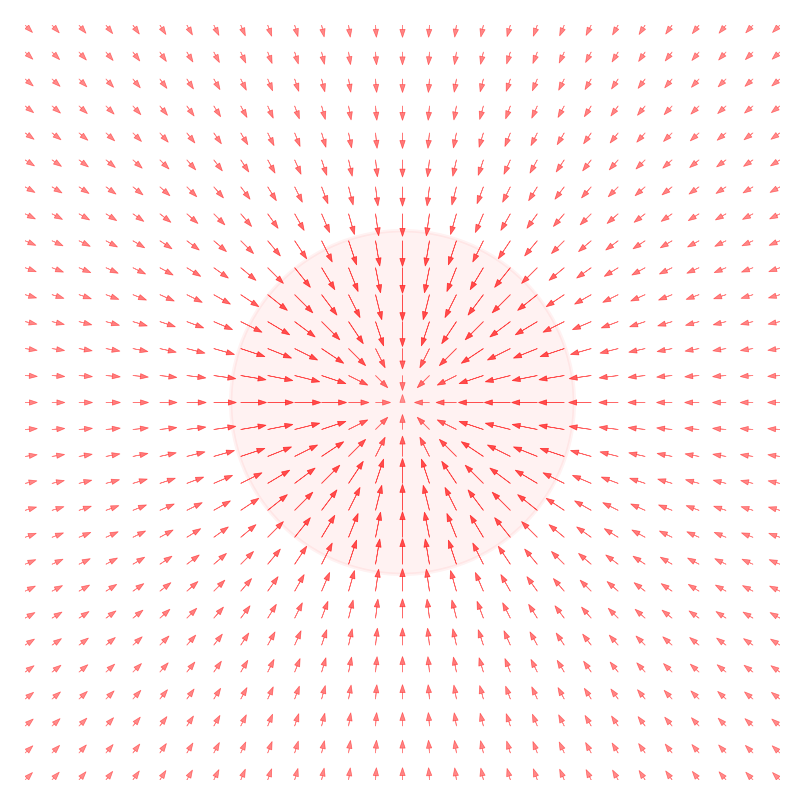

In [8]:
# Vector field drawing
# Initial setup
plt.figure(dpi=250)
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])

grid = np.mgrid[xlim[0]:(xlim[1]+step):step, ylim[0]:(ylim[1]+step):step]
gx, gy = np.array(grid[0]).reshape(-1), np.array(grid[1]).reshape(-1)

for x,y in zip(gx, gy):
    dx,dy = vec(x,y)
    dx, dy = dx*0.7, dy*0.7
    alpha = 0.7*(E(math.sqrt(x*x + y*y))/E_max*0.4 + 0.6)
    plt.arrow(x,y,dx,dy, color="r", head_width=step//5, linewidth=0.2, alpha=alpha)

# Show Earth radius if chosen radius is bigger than R_Earth
if (xlim[0] >= R_Earth or xlim[1] >= R_Earth or
    ylim[0] >= R_Earth or ylim[1] >= R_Earth):
    circ = plt.Circle((0,0),R_Earth, color="r", alpha=0.05)
    plt.gca().add_patch(circ)

plt.gca().set_aspect(1)
plt.axis("off")
plt.show()

# Heatmap
*Тонкая чёрная обводка - радиус земли*

In [9]:
# Heatmap Settings
# Границы по осям, где (0,0) - центр земли
xlim = (-14000000, 14000000)
ylim = (-14000000, 14000000)
# Шаг для вычислений (М)
step = 25000

xres, yres = (xlim[1]-xlim[0])//step + 1, (ylim[1]-ylim[0])//step + 1
print(f"Разрешение тепловой карты: {xres}x{yres}")
if xres*yres > 1500**2: print("Это может быть долго")

Разрешение тепловой карты: 1121x1121


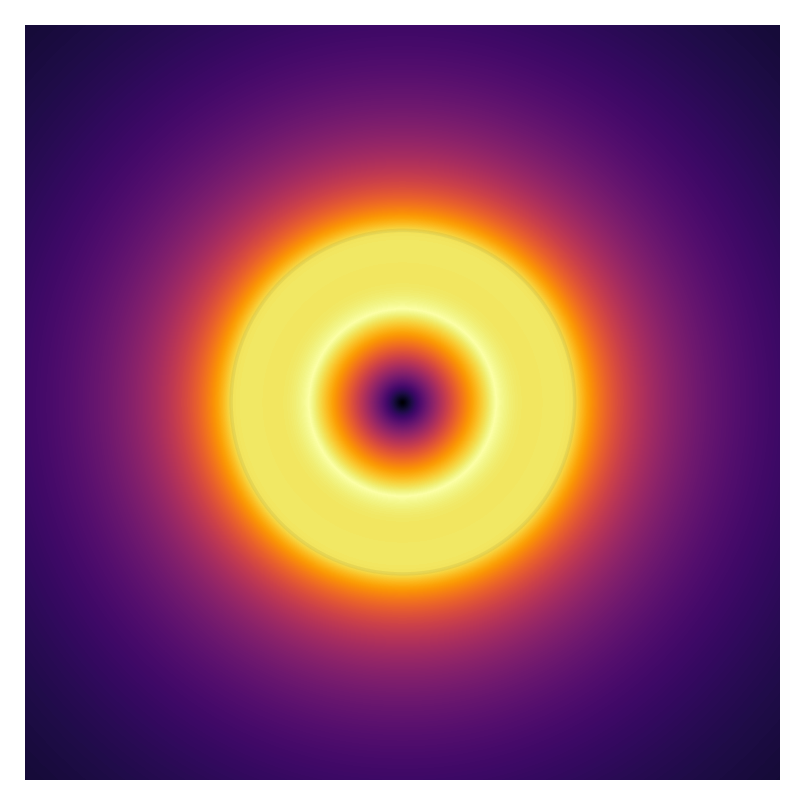

In [10]:
# Heatmap generation

hmap = np.zeros((yres, xres))

for xi in range(xres):
    for yi in range(yres):
        x = xlim[0] + step*xi
        y = ylim[0] + step*yi
        dist = math.sqrt(x*x + y*y)
        hmap[yi][xi] = E(dist)

plt.figure(dpi=250)
# magma, rainbow
plt.imshow(hmap, cmap="inferno", origin="lower")
# Show Earth radius if chosen radius is bigger than R_Earth
if (xlim[0] >= R_Earth or xlim[1] >= R_Earth or
    ylim[0] >= R_Earth or ylim[1] >= R_Earth):
    xcenter = xres*(-xlim[0])/(xlim[1]-xlim[0])
    ycenter = yres*(-ylim[0])/(ylim[1]-ylim[0])

    circrad = None
    if (xlim[0] != 0):
        circrad = xcenter*(R_Earth/abs(xlim[0]))
    else:
        circrad = (xres-xcenter)*(R_Earth/abs(xlim[1]))
    circ = plt.Circle((xcenter,ycenter),circrad, color="k", alpha=0.05, fill=False)
    plt.gca().add_patch(circ)


plt.gca().set_aspect(1)
plt.axis("off")
plt.show()